Test MSE: 0.164


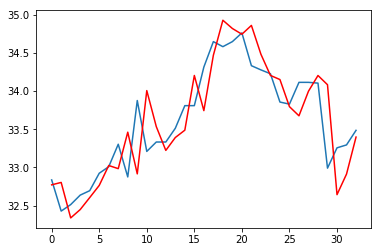

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import datetime as datetime
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
#from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
    
    
# based on https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/    

TEST_RATIO = 0.70

def print_model_fit_summary(model_fit):
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())

    
gm_df = pd.read_csv('gm_us_d.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)    
#gm_us_df.plot( y='Otwarcie', figsize=(20,10))
#autocorrelation_plot(gm_df)
gm_df = gm_df.truncate(after="2017-08-07", before="2017-03-07")
series_df = gm_df[['Otwarcie']]

vseries = series_df.values
split_val = int(TEST_RATIO * vseries.size)
dataset, tests = vseries[:split_val], vseries[split_val:]
dataset = [x[0] for x in dataset]
tests   = [x[0] for x in tests]
predictions = []
for obs in tests:
    model = ARIMA(dataset, order=(5,2,0))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()
    residuals = pd.DataFrame(model_fit.resid)
    yhat = prediction[0][0]
    predictions.append(yhat)
    dataset.append(obs)
    #print("Predicted: '%.3f', observed: '%.3f', difference: '%.3f'" % (yhat, obs, yhat - obs))
error = mean_squared_error(tests, predictions)
print('Test MSE: %.3f' % error)
plt.plot(tests)
plt.plot(predictions, color='red')
plt.show()

